In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

In [12]:
dat = pd.read_csv("./college_earnings_for_modeling.csv")

In [13]:
print(dat.columns)
print(dat.shape) # plenty of data to work with
dat.head()

Index(['School Name', 'State', 'School Ownership',
       'Full-time Faculty Rate (%)', 'Faculty Average Salary',
       'Student Enrollment Size', 'Attendance Cost',
       '150% Completion Rate at 4 Yr (%)', 'Admission Rate (%)',
       'RetentionRate_4yr', 'Female_Majority', 'SAT Average (Overall)',
       'SAT 75th Percentile Math', 'SAT 75th Percentile Reading',
       'SAT 75th Percentile Writing',
       'Percent of Students Earning >$25K (6 Yrs after Entry)',
       'Percent of Students Earning >$25K (10 Yrs after Entry)',
       'LowIncRatio_10yr', 'HighIncRatio_10yr', 'LowIncRatio_6yr',
       'HighIncRatio_6yr', 'Mean Earnings (6 Yrs after Entry)',
       'Mean Earnings (10 Yrs after Entry)'],
      dtype='object')
(1989, 23)


,School Name,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Attendance Cost,150% Completion Rate at 4 Yr (%),Admission Rate (%),RetentionRate_4yr,...,SAT 75th Percentile Reading,SAT 75th Percentile Writing,Percent of Students Earning >$25K (6 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),LowIncRatio_10yr,HighIncRatio_10yr,LowIncRatio_6yr,HighIncRatio_6yr,Mean Earnings (6 Yrs after Entry),Mean Earnings (10 Yrs after Entry)
0,Alabama A & M University,AL,Public,99.60,91188.0,5090.0,23445.0,28.66,89.65,54.03,...,520.0,457.0,45.3,599000.0,0.090177,0.032613,0.179371,0.028291,28400.0,35500.0
1,University of Alabama at Birmingham,AL,Public,76.19,136560.0,13549.0,25542.0,61.17,80.60,86.40,...,668.0,NaN,66.9,747000.0,0.096243,0.047900,0.108421,0.055355,39400.0,48400.0
2,University of Alabama in Huntsville,AL,Public,67.02,116364.0,7825.0,24861.0,57.14,77.11,81.80,...,700.0,NaN,68.5,779000.0,0.087157,0.048307,0.087540,0.045240,40300.0,52000.0
3,Alabama State University,AL,Public,67.97,86328.0,3603.0,21892.0,31.77,98.88,62.02,...,531.0,NaN,39.3,528000.0,0.421593,0.041910,0.330003,0.034416,24400.0,30600.0
4,The University of Alabama,AL,Public,77.07,124188.0,30610.0,30016.0,72.14,80.39,87.23,...,660.0,600.0,69.5,786000.0,0.046521,0.066122,0.057269,0.077328,42400.0,51600.0


In [14]:
# examine issues further
dat = dat[dat["Student Enrollment Size"]!=0] # 3 universities with no reported enrollment ---also missing many other vars
missing_values = dat.isnull().sum()
print(missing_values.sort_values(ascending=False))
missing_values_in_rows = dat.isnull().sum(axis=1)
print(missing_values_in_rows.sort_values(ascending=False))
# important to consider: what is good threshold of missing values to constitue throwing out obs?
# could also try EM algorithm + MI for imputing these data

# drop obs with missing values in response column(s)
dat = dat[dat["Mean Earnings (6 Yrs after Entry)"].isnull()==False]



SAT 75th Percentile Writing                               1301
SAT 75th Percentile Reading                                930
SAT 75th Percentile Math                                   930
SAT Average (Overall)                                      885
HighIncRatio_10yr                                          370
Admission Rate (%)                                         353
HighIncRatio_6yr                                           344
Percent of Students Earning >$25K (10 Yrs after Entry)     283
Mean Earnings (10 Yrs after Entry)                         270
Percent of Students Earning >$25K (6 Yrs after Entry)      265
LowIncRatio_10yr                                           250
Mean Earnings (6 Yrs after Entry)                          250
LowIncRatio_6yr                                            225
Attendance Cost                                            170
150% Completion Rate at 4 Yr (%)                           147
Full-time Faculty Rate (%)                             

In [15]:
# look for missing values/other potential issues
dat.describe()

,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Attendance Cost,150% Completion Rate at 4 Yr (%),Admission Rate (%),RetentionRate_4yr,SAT Average (Overall),SAT 75th Percentile Math,SAT 75th Percentile Reading,SAT 75th Percentile Writing,Percent of Students Earning >$25K (6 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),LowIncRatio_10yr,HighIncRatio_10yr,LowIncRatio_6yr,HighIncRatio_6yr,Mean Earnings (6 Yrs after Entry),Mean Earnings (10 Yrs after Entry)
count,1700.000000,1720.000000,1735.000000,1652.000000,1665.000000,1476.000000,1657.000000,1060.000000,1017.000000,1017.000000,667.000000,1717.000000,1693.000000,1690.000000,1589.000000,1701.000000,1607.000000,1736.000000,1707.000000
mean,65.420712,96844.172093,5001.518732,38032.791162,55.156354,70.078686,74.219813,1142.497170,610.472960,613.925270,572.245877,64.880955,739112.817484,2.763992,0.642358,3.742308,0.495008,39203.571429,50261.862917
std,26.933711,31461.827918,8442.298665,17114.296557,19.858825,20.193190,14.072419,130.185605,73.280119,60.746718,80.238175,14.047024,117452.373155,37.883640,7.252906,47.429555,4.914861,11389.718248,16219.323778
min,0.000000,11916.000000,13.000000,5663.000000,0.000000,5.010000,0.000000,842.000000,405.000000,415.000000,360.000000,8.100000,90000.000000,0.001126,0.000568,0.004929,0.002765,13300.000000,18000.000000
25%,45.882500,77220.000000,900.000000,23588.500000,42.920000,59.880000,67.590000,1053.000000,560.000000,570.000000,520.000000,58.000000,688000.000000,0.065933,0.057860,0.073143,0.062799,32700.000000,40850.000000
50%,68.275000,91572.000000,1894.000000,34450.000000,55.330000,74.025000,76.160000,1117.000000,600.000000,610.000000,560.000000,66.700000,765000.000000,0.121958,0.096552,0.142178,0.101329,37600.000000,47900.000000
75%,89.300000,112833.000000,5244.000000,50152.750000,68.530000,84.525000,83.170000,1207.000000,650.000000,650.000000,610.000000,73.400000,814000.000000,0.208883,0.149088,0.254232,0.155258,43100.000000,55550.000000
max,100.000000,253716.000000,109233.000000,81531.000000,100.000000,100.000000,100.000000,1566.000000,800.000000,780.000000,800.000000,97.200000,957000.000000,892.514019,158.458333,1111.083333,137.083333,104500.000000,171800.000000


In [16]:
# save data
dat.to_csv("college_roi_dat.csv",index=False)

In [ ]:
# # export preprocessed feature sets!
# X_filled.to_csv("X_filled.csv")
# Xtrain_filled.to_csv("Xtrain_filled.csv")
# Xtest_filled.to_csv("Xtest_filled.csv")


In [20]:
X_filled = pd.read_csv("X_filled.csv",index_col="School Name")
Xtrain_filled = pd.read_csv("Xtrain_filled.csv",index_col="School Name")
ytrain = pd.read_csv("ytrain.csv",index_col="School Name").squeeze()

In [21]:
ytrain.shape

(1215,)

In [22]:
# fit model
rf = RandomForestRegressor(oob_score=True)
rf.fit(Xtrain_filled,ytrain)

RandomForestRegressor(oob_score=True)

In [23]:
rf.feature_names_in_

array(['Full-time Faculty Rate (%)', 'Faculty Average Salary',
       'Student Enrollment Size', 'Attendance Cost', 'CompletionRate150',
       'Admission Rate (%)', 'RetentionRate', 'SAT Average',
       'x0_Private ForProfit', 'x0_Private NonProfit', 'x0_Public'],
      dtype=object)

In [24]:
rf.oob_score_ 
# ~50% oob rsq (was ~55% with Female Majority variable, but that flag seems unethical to try to make decisions about, as just predicted lower for female majority schools)
# (female low pay is sad issue that hopefully market can address; not helpful for telling colleges what to do, besides standing up for higher pay for women)

0.49817558894107206

In [25]:
# begin shap
import shap
from shap import TreeExplainer
explainer = TreeExplainer(rf)
# shap_values_train = explainer.shap_values(Xtrain)
# shap_values_test = explainer(Xtrain_filled) # test this out on smaller subset to start
shap_values = explainer(X_filled) # now get shap values for all 


In [ ]:
# find test case universities
idx_of_interest1 = np.argwhere(X_filled.index == 'Pacific Lutheran University')[0][0]
print(idx_of_interest1)
idx_of_interest2 = np.argwhere(X_filled.index == 'Brigham Young University')[0][0]
print(idx_of_interest2)

1487
1417


In [ ]:
# are these values from PLU as expected?
shap_values[idx_of_interest1]

In [1]:
shap.summary_plot(shap_values,plot_type = "bar")

NameError: name 'shap' is not defined

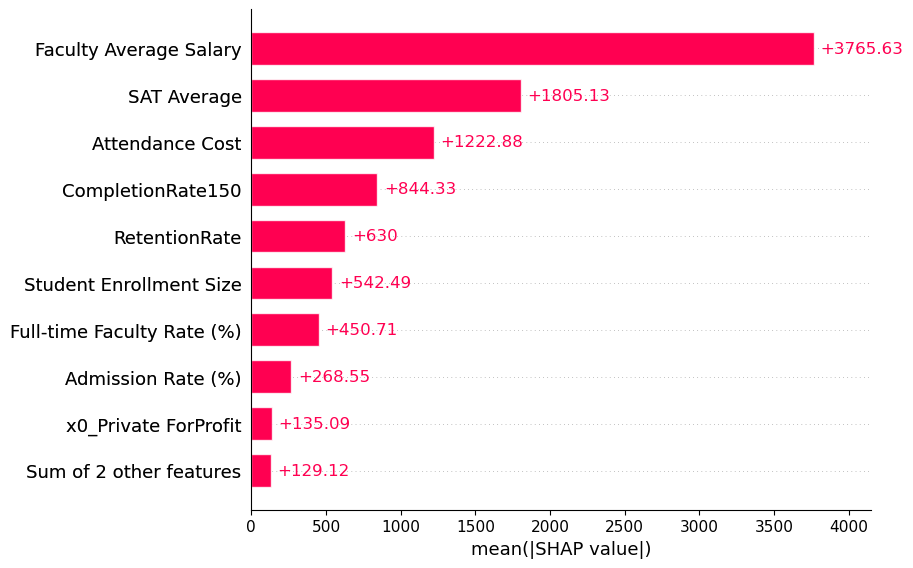

In [120]:
# global summary
shap.plots.bar(shap_values)

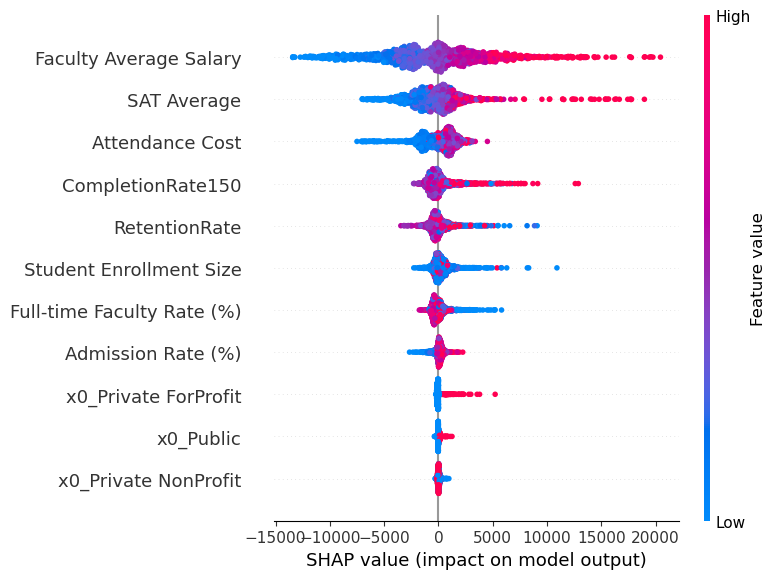

In [121]:
shap.summary_plot(shap_values)

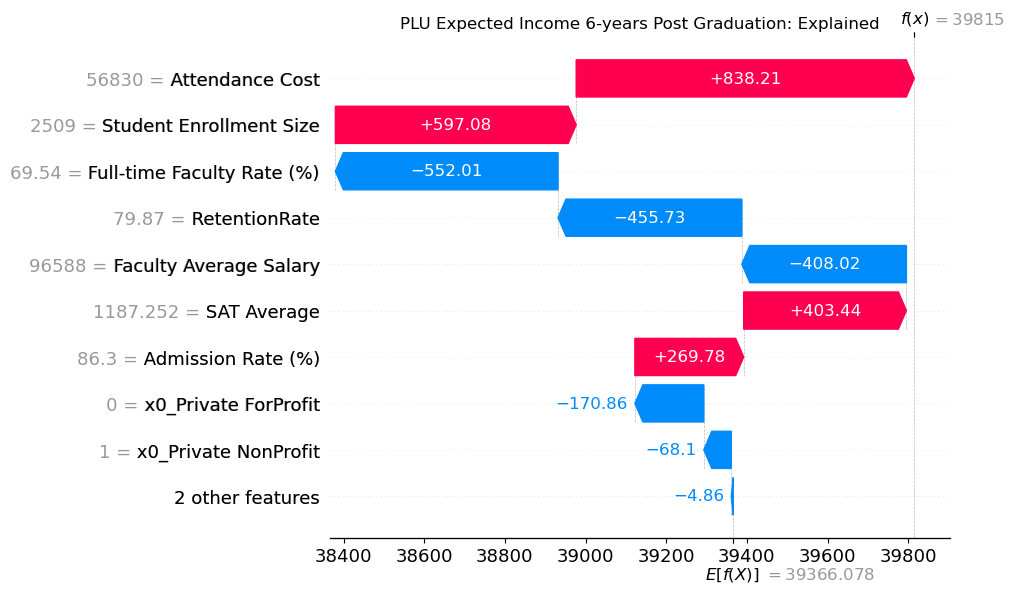

In [124]:
# PLU
idx_of_interest1 = np.argwhere(X_filled.index == 'Pacific Lutheran University')[0][0]
shap.plots.waterfall(shap_values[idx_of_interest1],show=False)
plt.title('PLU Expected Income 6-years Post Graduation: Explained', y = 1)
plt.show()

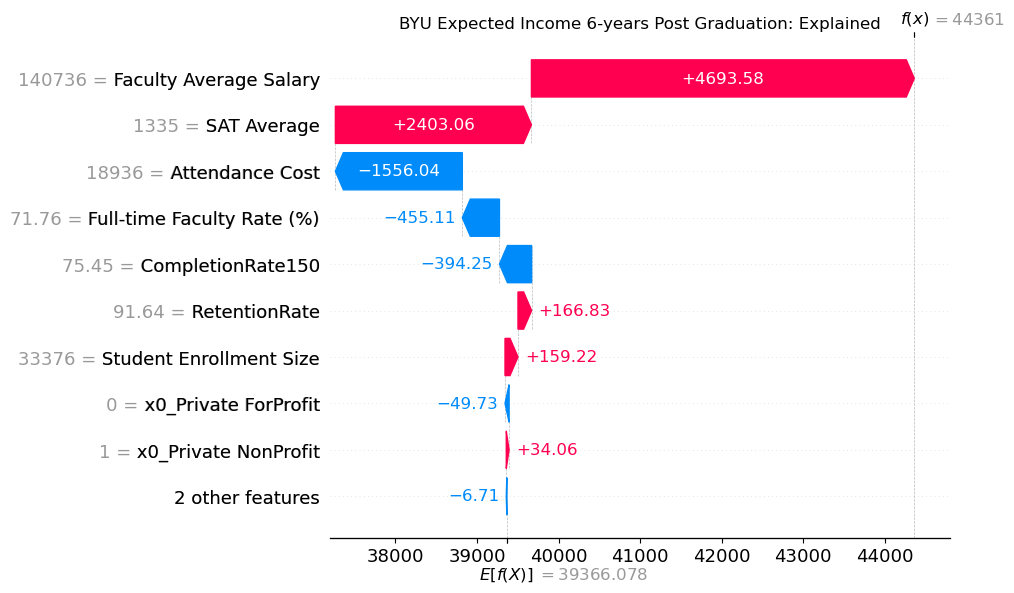

In [125]:
# BYU
shap.plots.waterfall(shap_values[idx_of_interest2],show=False)
plt.title('BYU Expected Income 6-years Post Graduation: Explained', y = 1)
plt.show()
# NOTE: can change: max_display bigger, automation of school name

In [2]:
# non-waterfall, localized bar plot
# shap.plots.bar(shap_values[idx_of_interest2],show=False)
# plt.title('BYU Expected Income 6-years Post Graduation: Explained', y = 1)
# plt.show()

NameError: name 'shap' is not defined

In [105]:
# shap.plots.force(shap_values_test[147]) # need Javascript library to use forceplot

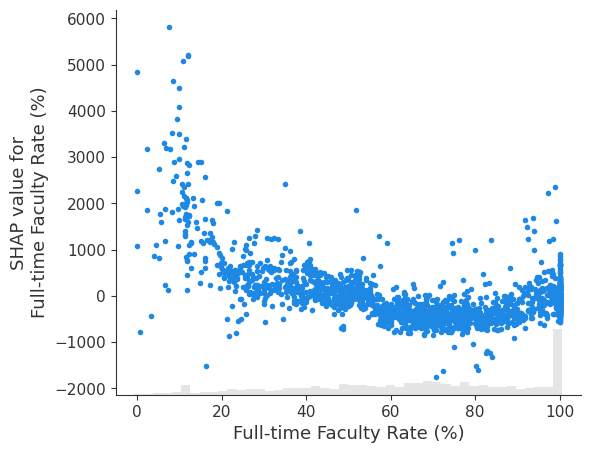

In [126]:
# examine single feature
shap.plots.scatter(shap_values[:, 'Full-time Faculty Rate (%)'])

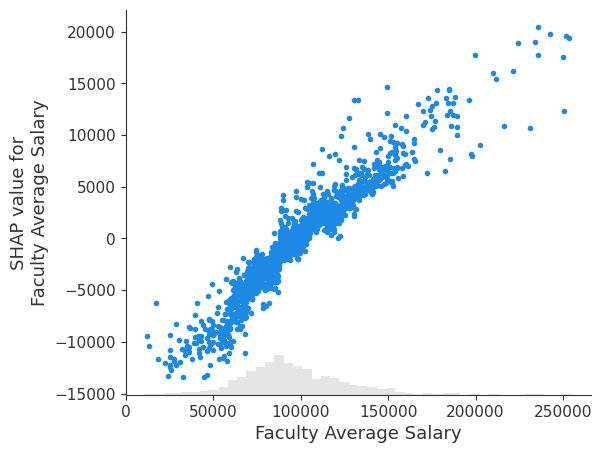

In [127]:
# examine another single feature
shap.plots.scatter(shap_values[:, 'Faculty Average Salary'])

Faculty Average Salary appears to be the most influential on Expected Income; however, are there any **potential interations** with other variables?

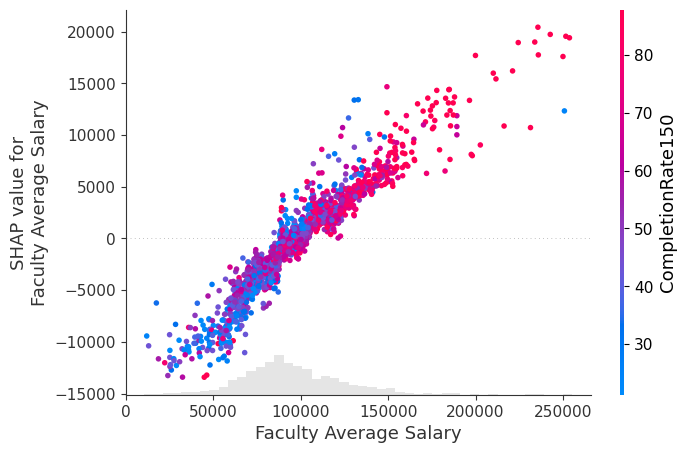

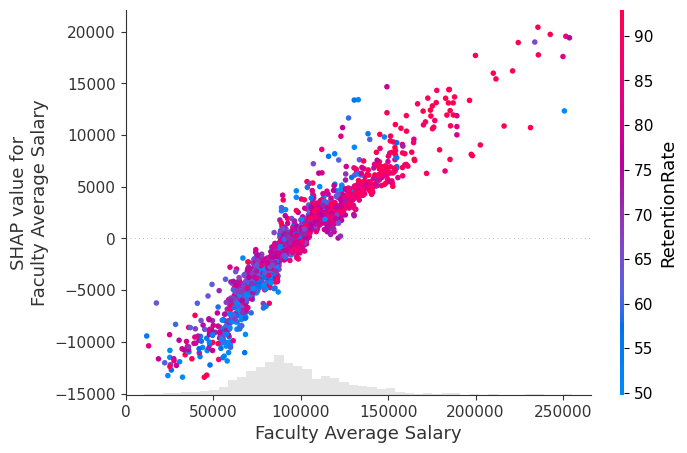

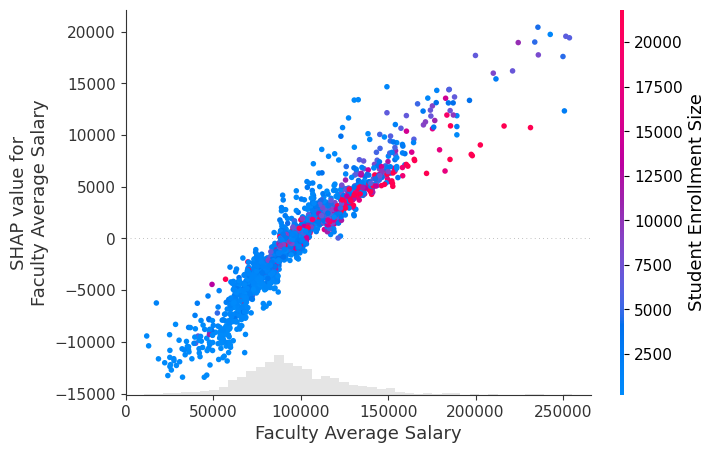

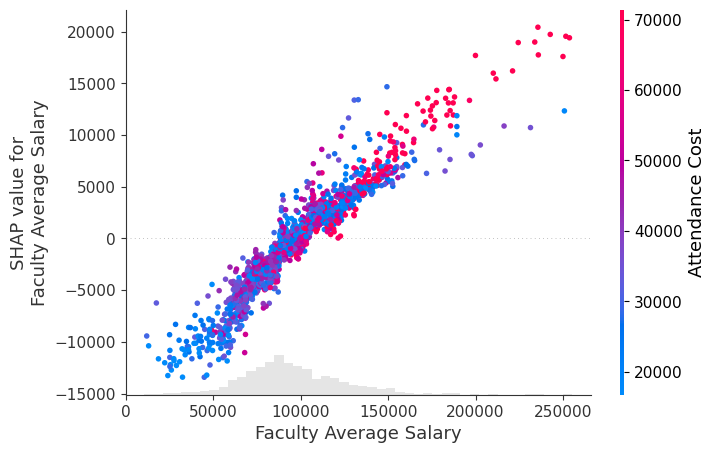

In [129]:

inds_fs = shap.utils.potential_interactions(shap_values[:, 'Faculty Average Salary'], shap_values)
# make plots colored by each of the top possible interacting features
top_num = 4
for i in range(top_num):
    shap.plots.scatter(shap_values[:, "Faculty Average Salary"], color=shap_values[:, inds_fs[i]])